# Welcome to Exploratory Data Analysis (EDA) for Python workshop!

In today's workshop, we will delve into the art of conducting Exploratory Data Analysis (EDA) on a given dataset. EDA encompasses a broad spectrum of critical data analysis components, which include, but are not restricted to, the following:

- Data Preprocessing: This encompasses activities such as data cleaning, summarization, and wrangling, ensuring that the dataset is in a usable and informative state.
- Data Visualization: EDA entails univariate, bivariate, and multivariate analyses, employing various visualization techniques to unveil underlying patterns and relationships within the data.
- Hypothesis Formulation: EDA aids in the generation of hypotheses, setting the stage for further testing and validation through statistical techniques.
- Time Series Analysis: For datasets with temporal aspects, EDA includes the examination of trends, seasonality, and patterns over time, providing insights into data evolution.
- Feature Selection: Identifying and selecting the most relevant features is a crucial step in EDA, as it can significantly impact the success of subsequent analyses and modeling.

By the end of this workshop, you will have a solid foundation in conducting EDA, a vital skill in the realm of data analysis and decision-making.


## Today's data set: penguins 

Today's data set shows size measurements for adult foraging penguins near Palmer Station, Antarctica. More specifically, it includes measurements for penguin species, island in Palmer Archipelago, size (flipper length, body mass, bill dimensions), and sex. We'll use a built-in data set from R programming language.

## 1. Import the data set, glimpse your data set, get summary statistics

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = pd.read_csv("penguins.csv")

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
#Artwork by @allison_horst.
from IPython.display import Image
img = 'penguins.png'
Image(url=img)

In [5]:
penguins.shape

(344, 8)

In [6]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [7]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [8]:
penguins["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [9]:
penguins["sex"].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

In [10]:
penguins["year"].value_counts()

year
2009    120
2008    114
2007    110
Name: count, dtype: int64

## Missing Values?

In [11]:
# How many NA values?
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [16]:
pd.isna?

Signature: pd.isna(obj: 'object') -> 'bool | npt.NDArray[np.bool_] | NDFrame'
Docstring:
Detect missing values for an array-like object.

This function takes a scalar or array-like object and indicates
whether values are missing (``NaN`` in numeric arrays, ``None`` or ``NaN``
in object arrays, ``NaT`` in datetimelike).

Parameters
----------
obj : scalar or array-like
    Object to check for null or missing values.

Returns
-------
bool or array-like of bool
    For scalar input, returns a scalar boolean.
    For array input, returns an array of boolean indicating whether each
    corresponding element is missing.

See Also
--------
notna : Boolean inverse of pandas.isna.
Series.isna : Detect missing values in a Series.
DataFrame.isna : Detect missing values in a DataFrame.
Index.isna : Detect missing values in an Index.

Examples
--------
Scalar arguments (including strings) result in a scalar boolean.

>>> pd.isna('dog')
False

>>> pd.isna(pd.NA)
True

>>> pd.isna(np.nan)
True

ndarr

In [15]:
penguins[penguins.sex.isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [17]:
# As we have a very small number of missing values, just drop them! Otherwise, you'll have to think of an imputing strategy.
penguins = penguins.dropna(how = "any")
# ‘any’ : If any of the column values is NA in a row, drop it from the data set.
# ‘all’ : If all column values are NA in a row, drop it from the data set.
penguins.shape

(333, 8)

## 2. Find Associations Among Different Variables

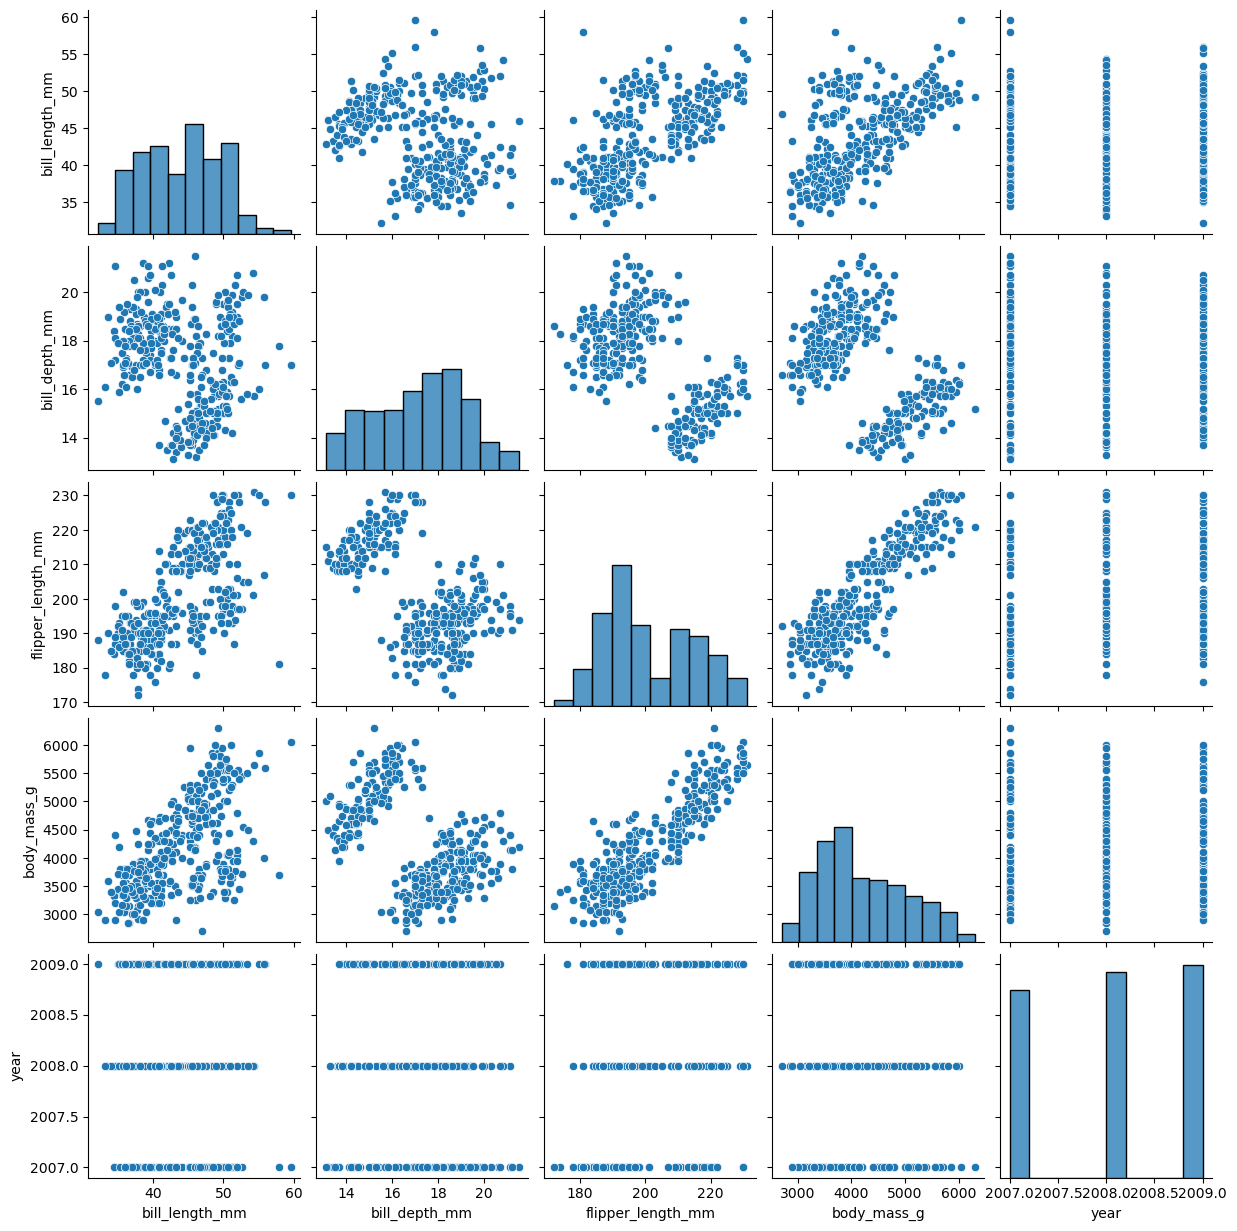

In [18]:
sns.pairplot(penguins)

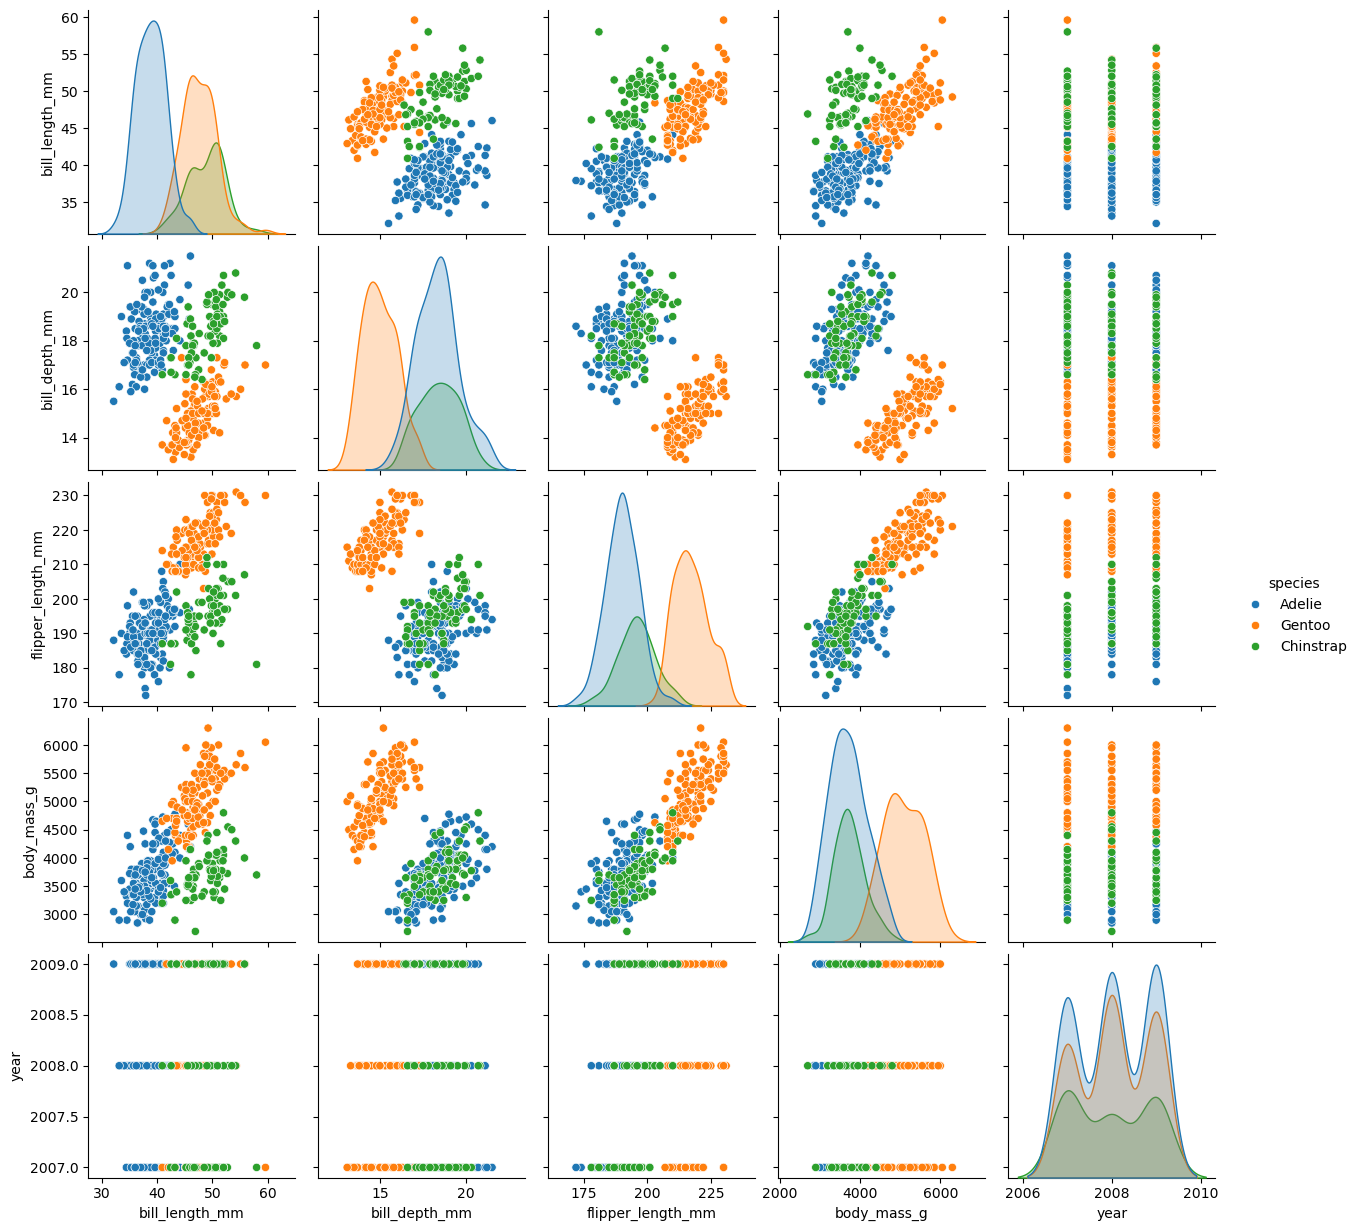

In [19]:
sns.pairplot(penguins, hue = "species")

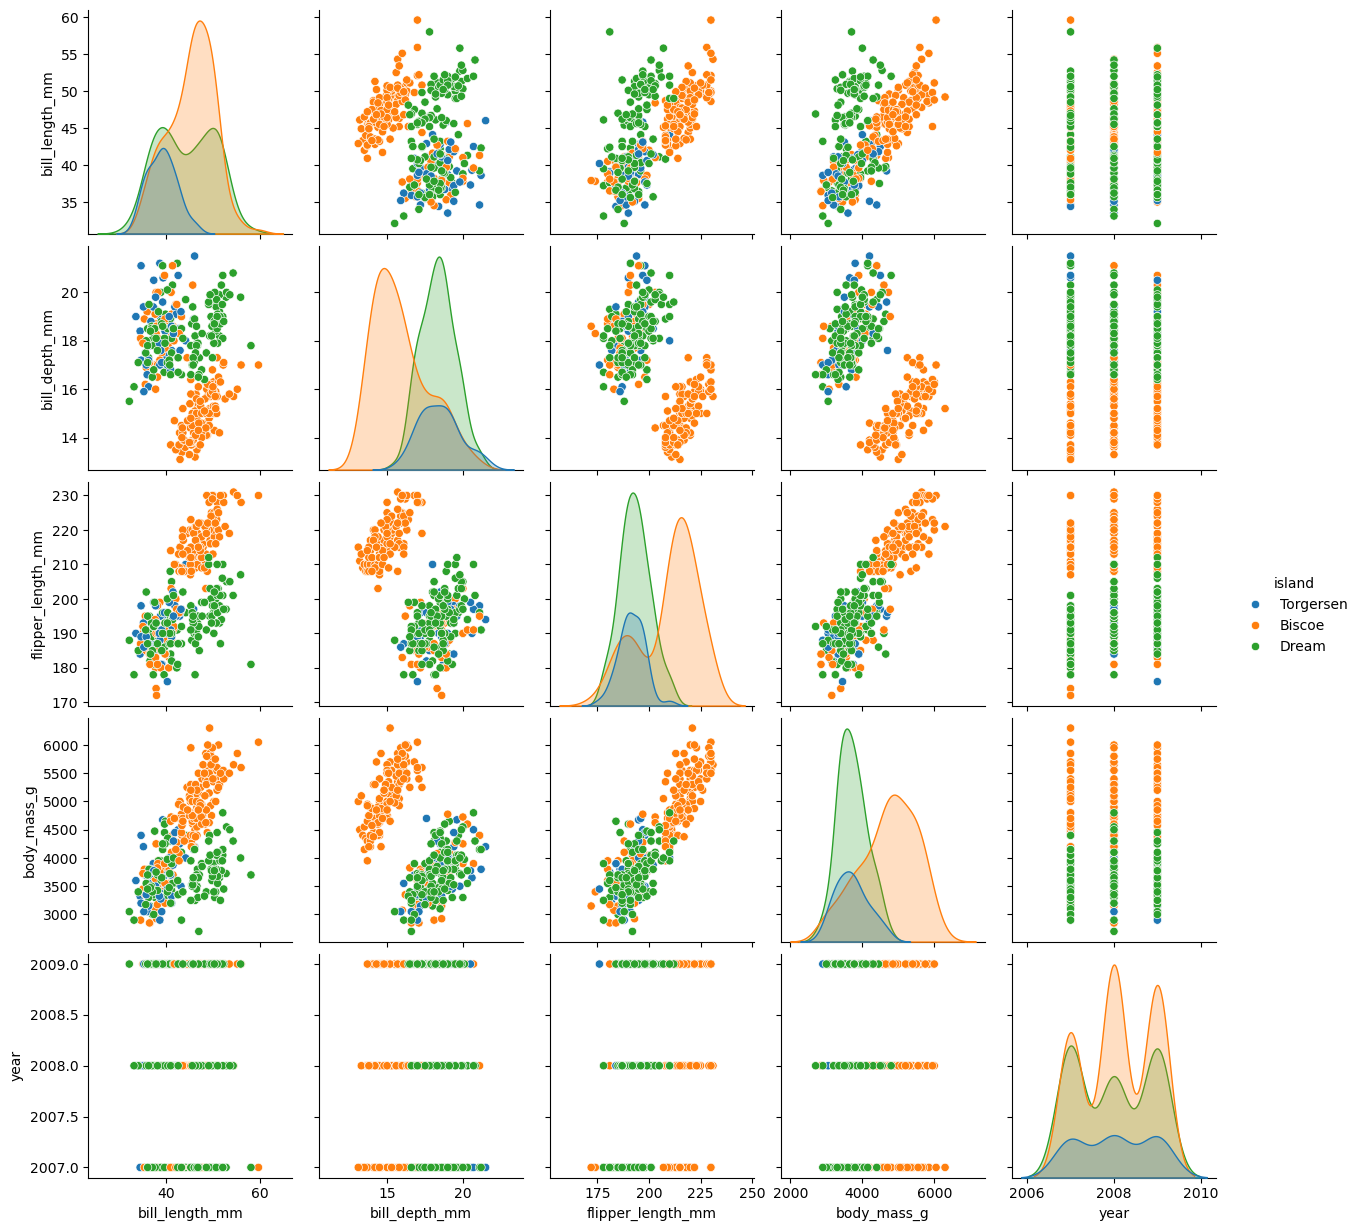

In [20]:
sns.pairplot(penguins, hue = "island")

### After seeing at this pairplot, do you already recognize interesting things? You have questions to be answered?

- Association between `body_mass_g` and `flipper_length_mm`: linear relationship?
- Association between `species` and `island`?
- Association between `bill_depth_mm` and `bill_length_mm` across different `species`?


### Heatmap Using Correlation: Degree of Linear Relationship Between Two Variables

<Axes: >

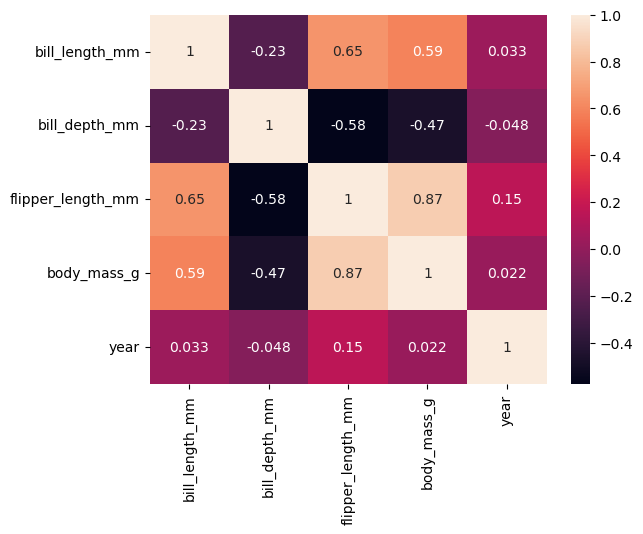

In [21]:
# calculate the correlation matrix on the numeric columns
corr = penguins.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, annot = True)

So at least we see that `year` is not really associated with any variable! And the most closely related variables are `flipper_length_mm` and `body_mass_g`.

### Contingency table

In statistics, a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the multivariate frequency distribution of the variables.

In [22]:
pd.crosstab(penguins['species'], penguins['island'])

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,55,47
Chinstrap,0,68,0
Gentoo,119,0,0


So we see that

    - In the `Torgersen` island, only `Adelie` penguin lives.
    
    - `Gentoo` penguin only lives in `Biscoe`, whereas `Chinstrap` penguin only lives in `Dream`.
    
    - `Adelie` penguin lives across three different islands. Then you might want to ask whether their habitat affects their physical conditions.
    

## 3. For `Adelie` penguins, do different habitats (island) affect their physical conditions?

In [23]:
adelie = penguins[penguins['species']=='Adelie']
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [24]:
stat_list = ["mean", "std"]
adelie.groupby("island")[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].agg(stat_list)

bill_length_mm           bill_depth_mm           flipper_length_mm  \
                    mean       std          mean       std              mean   
island                                                                         
Biscoe         38.975000  2.480916     18.370455  1.188820        188.795455   
Dream          38.520000  2.484276     18.240000  1.140598        189.927273   
Torgersen      39.038298  3.028097     18.451064  1.346472        191.531915   

                     body_mass_g              
                std         mean         std  
island                                        
Biscoe     6.729247  3709.659091  487.733722  
Dream      6.480325  3701.363636  448.774519  
Torgersen  6.220062  3708.510638  451.846351

<Axes: xlabel='island', ylabel='bill_depth_mm'>

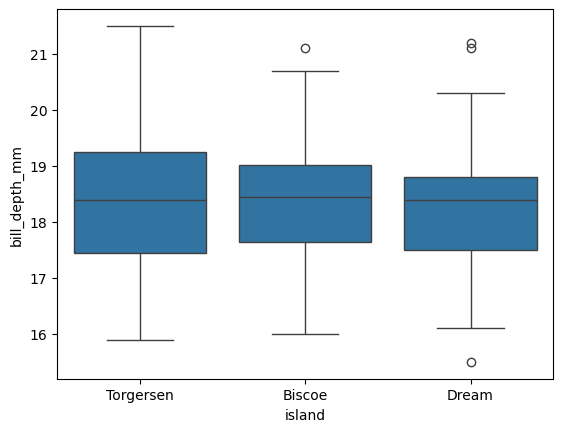

In [25]:
sns.boxplot(data = adelie, x = "island", y = "bill_depth_mm")

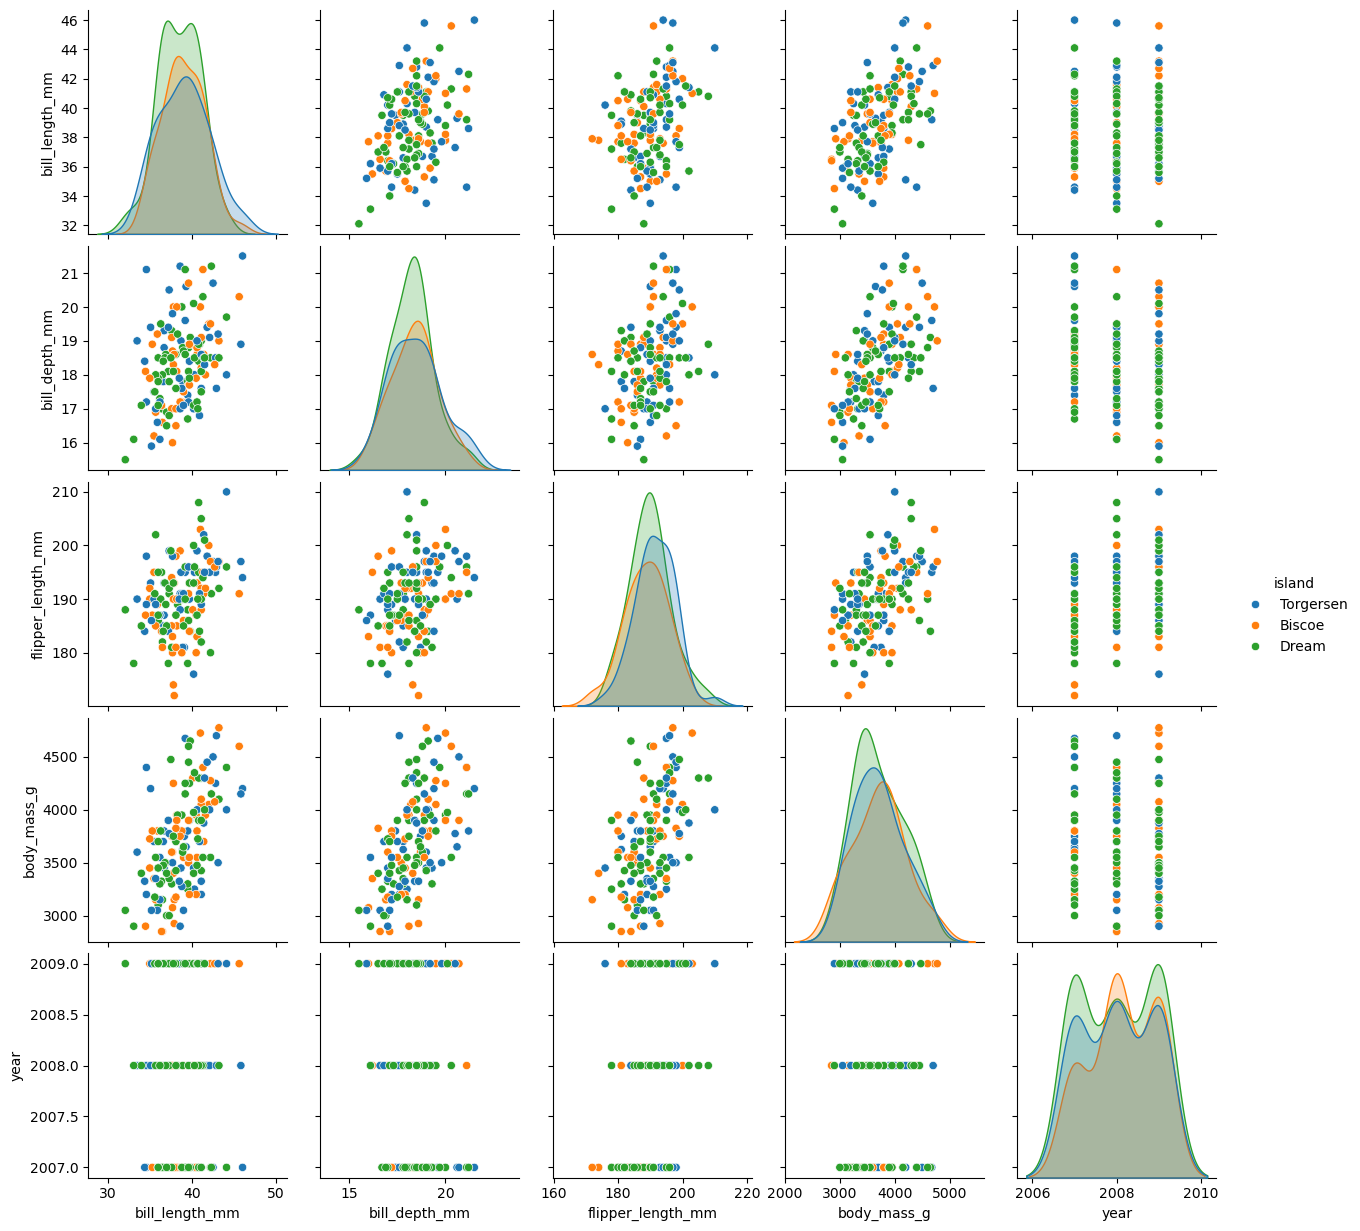

In [26]:
sns.pairplot(adelie, hue = 'island')

So there is not enough evidence that physical conditions of `Adelie` penguins are affected by different habitats.

## 4. Association between `body_mass_g` and `flipper_length_mm`: linear regression, confidence interval, and prediction interval.

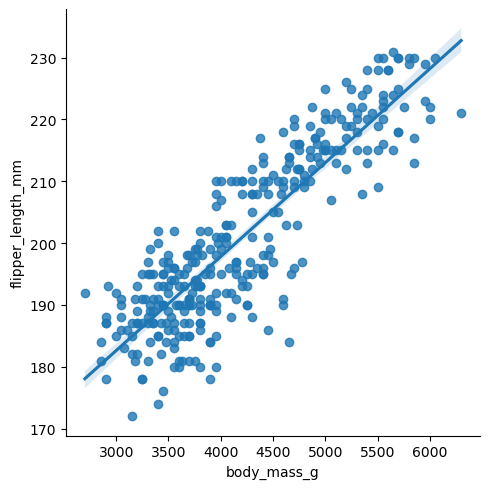

In [27]:
sns.lmplot(data = penguins, x = "body_mass_g", y = "flipper_length_mm")

In [33]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
# Create a least squares model for the 'flipper_length_mm' and 'body_mass_g' variables from our data set
y = penguins["flipper_length_mm"]
x = penguins["body_mass_g"]
X = sm.add_constant(x) # If you do not add a constant, linear fit will find the best line $y = ax$, which passes
# through (0,0), that fits the data set (instead of $y = ax + b$ for some $a$ and $b$)
penguins_model1 = sm.OLS(y, X)
fit1 = penguins_model1.fit()

# Display the summary of our model
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          3.13e-105
Time:                        18:12:31   Log-Likelihood:                -1112.1
No. Observations:                 333   AIC:                             2228.
Df Residuals:                     331   BIC:                             2236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         137.0396      1.999     68.562      0.000     133.108     140.972
body_mass_g     0.0152      0.000     32.562      0.000       0.014       0.016
==============================================================================
Omnibus:                       11.941   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.696
Skew:                          -0.474   Prob(JB):                      0.00175
Kurtosis:                       2.872   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X.shape

(333, 2)

In [35]:
X.head()

,const,body_mass_g
0,1.0,3750.0
1,1.0,3800.0
2,1.0,3250.0
4,1.0,3450.0
5,1.0,3650.0


### confidence interval vs prediction interval

- **Confidence intervals** estimate the range of a population parameter (mean in our case), given a sample, with a certain level of confidence.

- **Prediction intervals** estimate the range within which a future observation or data point will fall, given a statistical model, with a certain level of confidence.

In [26]:
# Use this result for prediction, i.e., given a penguin's body mass, what should be a corresponding flipper length?

test_body_mass = [4500, 5000, 5500]
test_body_mass = sm.add_constant(test_body_mass)

predictions = fit1.get_prediction(exog = test_body_mass) #exogenous variables
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,205.418313,0.399321,204.632786,206.203839,191.927049,218.909576
1,213.015945,0.526964,211.979323,214.052567,199.507735,226.524155
2,220.613577,0.710499,219.215914,222.011240,207.072876,234.154279


### Interpretation

- Prediction Interval: For example, a 95% prediction interval for the next value might mean, “We are 95% confident that the next observed value will lie within this interval.”
- Confidence Interval: A 95% confidence interval for the mean would mean, “We are 95% confident that the true population mean lies within this interval.”


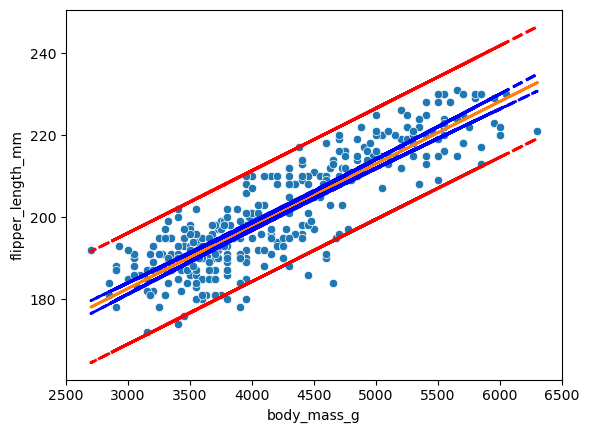

In [27]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table

#st, data, ss2 = summary_table(fit, alpha=0.05)
#prstd, iv_l, iv_u = wls_prediction_std(fit)

predictions_total = fit1.get_prediction(X)
predictions_total_summary = predictions_total.summary_frame(alpha=0.05)

fitted_values = predictions_total_summary.iloc[:,0]
mean_ci_lower = predictions_total_summary.iloc[:,2]
mean_ci_upper = predictions_total_summary.iloc[:,3]
obs_ci_lower = predictions_total_summary.iloc[:,4]
obs_ci_upper = predictions_total_summary.iloc[:,5]


sns.scatterplot(penguins, x = "body_mass_g", y = "flipper_length_mm")
plt.plot(X, fitted_values, '-', lw=2)
plt.plot(X, mean_ci_lower, 'b--', lw=2)
plt.plot(X, mean_ci_upper, 'b--', lw=2)
plt.plot(X, obs_ci_lower, 'r--', lw=2)
plt.plot(X, obs_ci_upper, 'r--', lw=2)
plt.xlim(2500,6500)
plt.show()

## 4. Use `bill_length_mm` and `bill_depth_mm` to predict `species`: Support Vector Machine (SVM)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

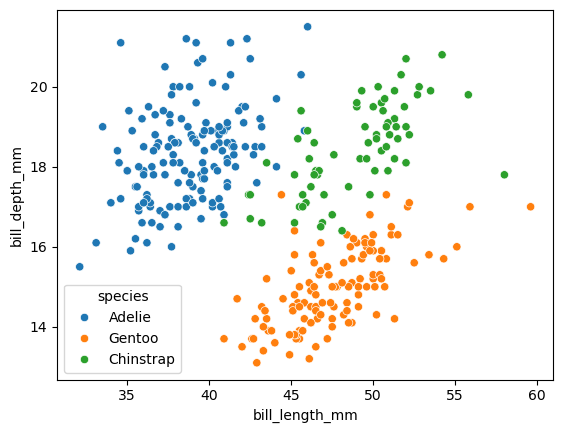

In [28]:
sns.scatterplot(penguins, x = "bill_length_mm", y ="bill_depth_mm", hue = "species")

It seems that three species are well distinguished across different levels of the combinations of `bill_depth_mm` and `bill_lengh_mm`. It appears that (linear) SVM will work out well to classify the species using these 2 independent variables.

### What is an SVM? How does it work?

In [29]:
img = 'svm_figure.png'
Image(url=img)

Assume we are given a training dataset of $n$ points of the form

\begin{equation}
(x_1, y_1), \cdots, (x_n, y_n),
\end{equation}

where the $y_{i}$ are either 1 or −1, each indicating the class to which the point $x_i$ belongs. We want to find the "maximum-margin hyperplane" that divides the group of points $x_i$ for which $y_i = 1$ from the group of points for which $y_i = -1$, which is defined so that the distance between the hyperplane and the nearest point $x_i$ from either group is maximized.

In [30]:
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

X = penguins.loc[:,["bill_length_mm", "bill_depth_mm"]]
y = penguins.loc[:,"species"]

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
model2 = svm.LinearSVC(C=C, max_iter=10000, dual="auto")

fit2 = model2.fit(X, y)

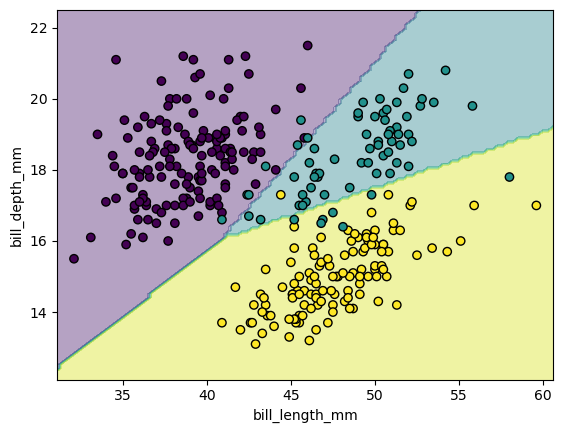

In [31]:
X0, X1 = X.iloc[:, 0], X.iloc[:, 1]

title = "bill depth vs. bill length for penguins of different species"
disp = DecisionBoundaryDisplay.from_estimator(
        model2,
        X,
        response_method="predict",
        alpha=0.4,
        xlabel="bill_length_mm",
        ylabel="bill_depth_mm",
)

cluster_colors = np.array(penguins.groupby('species').ngroup())
disp.ax_.scatter(X0, X1, c=cluster_colors, cmap='viridis', label= cluster_colors, edgecolor="k")

In [32]:
test_svm = [[50, 16], [50,18], [40,18]]
fit2.predict(test_svm)

C:\Users\Kiwon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array(['Gentoo', 'Chinstrap', 'Adelie'], dtype=object)

## 5. Feature Selection and Decision Tree

In [33]:
img = 'decisiontree_figure.jpg'
Image(url=img)

A tree showing survival of passengers on the Titanic ("sibsp" is the number of spouses or siblings aboard). The figures under the leaves show the probability of survival and the percentage of observations in the leaf.

### So what is Decision Tree?

**Decision Tree** is one of the most well known classification methods, whose goal is to create a model that predicts the value of a target variable based on several input variables. 

### How does Decision Tree work? (ft. Gini impurity)

Decision Tree selects feature and threshold combination that minimizes the *impurity* in the resulting child nodes, making the classes more homogenous within each node. And then recursion happens for the further children nodes.





In [36]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [40]:
from sklearn import tree

X = penguins.iloc[:,2:6] # only the numerical variables for now
y = penguins.iloc[:,0] #species
model3 = tree.DecisionTreeClassifier(max_depth=2)
model3 = model3.fit(X, y)

In [44]:
# Get the feature names
feature_names = X.columns.tolist()

In [46]:
model3.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

[Text(0.5, 0.8333333333333334, 'flipper_length_mm <= 206.5\ngini = 0.638\nsamples = 333\nvalue = [146, 68, 119]\nclass = Adelie'),
 Text(0.25, 0.5, 'bill_length_mm <= 43.35\ngini = 0.429\nsamples = 208\nvalue = [144.0, 63.0, 1.0]\nclass = Adelie'),
 Text(0.125, 0.16666666666666666, 'gini = 0.067\nsamples = 145\nvalue = [140, 5, 0]\nclass = Adelie'),
 Text(0.375, 0.16666666666666666, 'gini = 0.148\nsamples = 63\nvalue = [4, 58, 1]\nclass = Chinstrap'),
 Text(0.75, 0.5, 'bill_depth_mm <= 17.65\ngini = 0.107\nsamples = 125\nvalue = [2, 5, 118]\nclass = Gentoo'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 118\nvalue = [0, 0, 118]\nclass = Gentoo'),
 Text(0.875, 0.16666666666666666, 'gini = 0.408\nsamples = 7\nvalue = [2, 5, 0]\nclass = Chinstrap')]

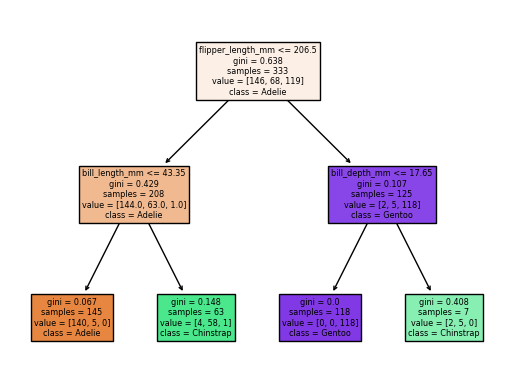

In [48]:
tree.plot_tree(model3, feature_names=feature_names, class_names=model3.classes_, filled=True)

In [49]:
#bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g

X_test = [[40, 15, 200, 4000], [40, 15, 210, 4500], [45, 20, 200, 4800]]
model3.predict(X_test)

C:\Users\Kiwon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

## So from today's workshop, we learned...

- how to import a data set and glimpse, extract summary statistics
- obtain intuition of the variables by looking at correlation heatmap and pairplot
- There is not sufficient evidence that `Adelie` penguins' physical conditions are affected by their habitats.
- We could predict `flipper_length_mm` of a penguin (or average) by using linear regression with prediction (confidence) interval.
- SVM can be useful in classifying 3 different species of penguins.
- Decision tree method shows that `flipper_length_mm` is the most important variable to classify different species of penguins, followed by `bill_length_mm` and `bill_depth_mm`.	

## Let us work on the exercise problems!

The iris data set for this assignment comes from the UCI machine learning repository (https://archive.ics.uci.edu/dataset/53/iris). This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.

The columns in this dataset are:
- Sepal.Length
- Sepal.Width
- Petal.Length
- Petal.Width
- Species

In [38]:
iris = pd.read_csv("IRIS.csv")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Try to answer these questions!

- Try to extract interesting information from the data set using the techniques we have learned so far! Such as the dimension of the data set, data types of each column, number of distinct values for column(s) of interest, and descriptive statistics of all the numerical variables.
- Draw a correlation heatmap to see the associations among different numerical variables. Which variables have the highest association? How about the lowest?
- Draw a pairplot but by using `Species` variable for coloring. Do you observe anything interesting?
- Draw a boxplot of `Petal.Width` across `Species`. What do you find interesting?
- Create a summary table showing the mean and standard deviation of each numerical variable per each species.
- Try Linear Regression on the two numerical variables, `Petal.Length` and `Petal.Width`. What kind of conclusions can you derive?
- Generate a decision tree with `max_depth = 2` where the target variable is `Species` and the independent variables are all the numerical variables from the `iris` data set. Which variables are the most important in determining `Species`? Do you think our decision tree is a "good" classifier?
- Using your decision tree, try predicting the species of the following data from iris flowers:
    - $[Sepal.Length, Sepal.Width, Petal.Length, Petal.Width] = [[7.5, 3, 6, 2.1], [6, 2.9, 4, 1.2], [4.9, 3.4, 1.5, 0.5]]$.

## Thanks for attending Python workshops in the Fall 2024 semester!

Next semester CDSI is planning to run workshops on Machine Learning for Python! I hope those workshop series will be really helpful to enhancing your coding skills in Python!

## References

- https://en.wikipedia.org/wiki/Contingency_table
- https://en.wikipedia.org/wiki/Support_vector_machine
- By Larhmam - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=73710028
- https://en.wikipedia.org/wiki/Decision_tree_learning
- https://commons.wikimedia.org/wiki/File:Decision_Tree.jpg
